# need to parse for every genotype
The read depth distribution of variant genotypes (histogram)
This information can be found in the sample specific FORMAT field for each variant/line. Check the file header to decide which ID is appropriate.

Format field: 9th col

ID=DP; 3rd

The quality distribution of variant genotypes (histogram)
This information can be found in the sample specific FORMAT field for each variant/line. Check the file header to decide which ID is appropriate.

ID=GQ; 2nd

# parse single column

The allele frequency spectrum of your identified variants (histogram)
This information is pre-calculated for you and can be found in the variant specific INFO field. Check the file header to decide which ID is appropriate.

INFO field: 8th col

ID=AF; 4th

A summary of the predicted effect(s) of each variant as determed by snpEff (barplot)
This information was added to the VCF by snpEff and can be found in the variant specific INFO field. Check the file header to decide which ID is appropriate and how to parse the information.
We encourage you to consider every possible effect for each variant, but feel free to just grab the first one.

ID=ANN; -1th




In [3]:
file=open('/mnt/c/Users/Frank/jhubootcamp/qbb2020-answers/lab-week02/results.vcf', 'r')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

all_format=[]
RDepth=[]
GtQuality=[]

all_info=[]
freq=[]
effects=[]

for line in file.readlines():
    if "#" in line:
        continue
    # extract cols containing format for each genotype
    gt_format=line.rstrip("\n").split("\t")[9:19] 
    all_format.extend(gt_format) # put all format cells into one list (lose strain info)
    # extract info col
    info_cell=line.rstrip("\n").split("\t")[7] 
    all_info.append(info_cell)

for i in all_format:
    # DP is the 3rd and GQ the 2nd value in format cells
    if i.split(":")[2]=='.':
        continue
    RDepth.append(float(i.split(":")[2]))
    GtQuality.append(float(i.split(":")[1]))
    
for i in all_info:
    # AF is the 3rd and ANN the last value in INFO cells
    freq.append(i.split(";")[3])
    effects.append(i.split(";")[-1])

    
freq_num=[]
for i in freq:
# I had to drop a certain AF value that's "0.22222,0.11111"
# not sure what error led to this since it should not have two values
    if "," in i: 
        continue
    freq_num.append(float((i.strip("AF="))))
    
mut=[]
for i in effects:
    ann=i.split("|,")
    for j in ann:
        mut.append(j.partition("|")[2].partition("|")[0])
        
df_mut = pd.DataFrame(mut) 
counts=df_mut.value_counts()
# cursory look at the value counts show that there are rare variants with counts <=2
# suspect data artifact



Text(0, 0.5, 'Counts')

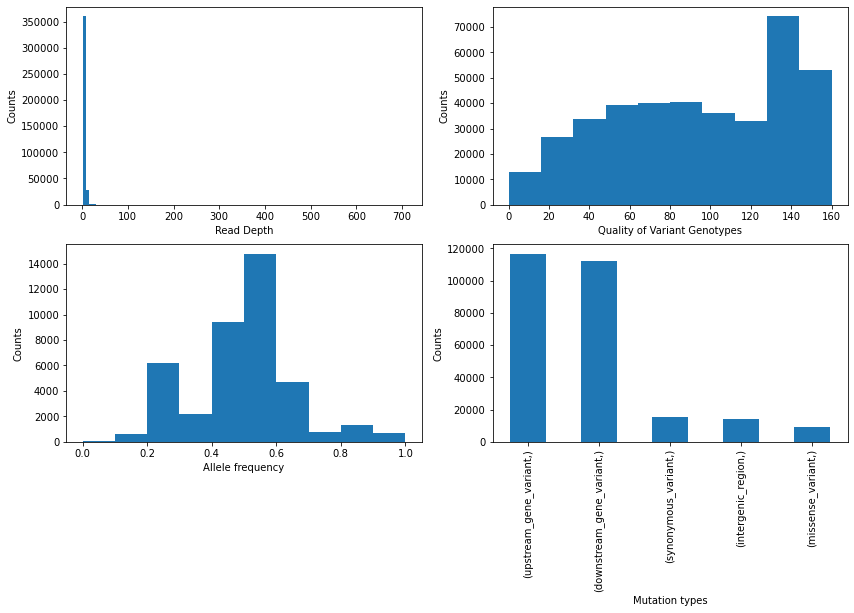

In [33]:
plt.subplots(2,2, figsize=(15,15))
ax1=plt.subplot(2, 2, 1)
plt.hist(RDepth, bins=100)
ax1.set_xlabel("Read Depth")
ax1.set_ylabel("Counts")

ax2=plt.subplot(2, 2, 2)
plt.hist(GtQuality)
ax2.set_xlabel("Quality of Variant Genotypes")
ax2.set_ylabel("Counts")

ax3=plt.subplot(2, 2, 3)
plt.hist(freq_num)
ax3.set_xlabel("Allele frequency")
ax3.set_ylabel("Counts")

plt.subplot(2, 2, 4)

ax4 = counts[0:5].plot(kind='bar', figsize=(14,8))
ax4.set_xlabel("Mutation types")
ax4.set_ylabel("Counts")

